# EDA

In [25]:
import pandas as pd
import seaborn as sns

In [5]:
df= pd.read_csv("data/unificado.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Id                     717 non-null    object
 1   Fecha_x                717 non-null    object
 2   Rol                    717 non-null    object
 3   Sexo                   717 non-null    object
 4   Edad                   717 non-null    int64 
 5   Fecha_fallecimiento    717 non-null    object
 6   Rango_etario           717 non-null    object
 7   N_victimas             717 non-null    int64 
 8   Aaaa_y                 717 non-null    int64 
 9   Mm_y                   717 non-null    int64 
 10  Dd_y                   717 non-null    int64 
 11  Hora                   717 non-null    object
 12  Hh                     717 non-null    int64 
 13  Lugar_del_hecho        717 non-null    object
 14  Tipo_de_calle          717 non-null    object
 15  Calle                  

In [4]:
import matplotlib.pyplot as plt

Renombrar algunos titulos del df para los gráficos.

In [9]:
df = df.rename(columns={'Aaaa_y':'Año',
                        'Mm_y':'Mes',
                        'Dd_y':'Dia',
                        'Victima_y':'Victima'})

In [10]:
df.columns

Index(['Id', 'Fecha_x', 'Rol', 'Sexo', 'Edad', 'Fecha_fallecimiento',
       'Rango_etario', 'N_victimas', 'Año', 'Mes', 'Dia', 'Hora', 'Hh',
       'Lugar_del_hecho', 'Tipo_de_calle', 'Calle', 'Cruce',
       'Dirección normalizada', 'Comuna', 'Xy (caba)', 'Pos x', 'Pos y',
       'Participantes', 'Victima', 'Acusado', 'Barrios'],
      dtype='object')

In [20]:
años = df['Año'].unique()
años

array([2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

## Analisis exploratorio

In [47]:
correlacion = df[['N_victimas', 'Año', 'Mes', 'Dia']].corr()

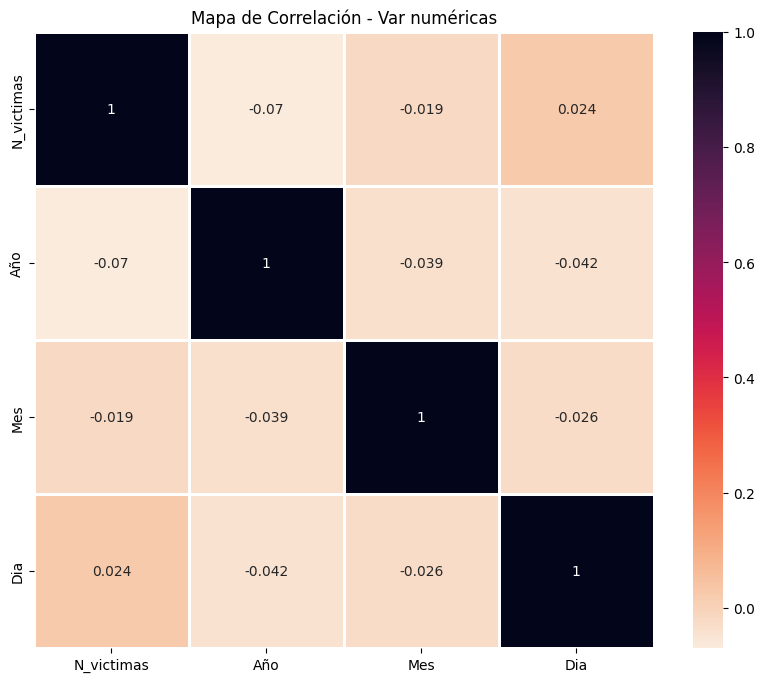

In [48]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True,cmap= "rocket_r", linewidths=1)
plt.title('Mapa de Correlación - Var numéricas')
plt.show()

No hay correlacion.

### Distribucion

C:\Users\SimpleDeco\AppData\Local\Temp\ipykernel_5520\1901584427.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x='N_victimas', palette="rocket_r")


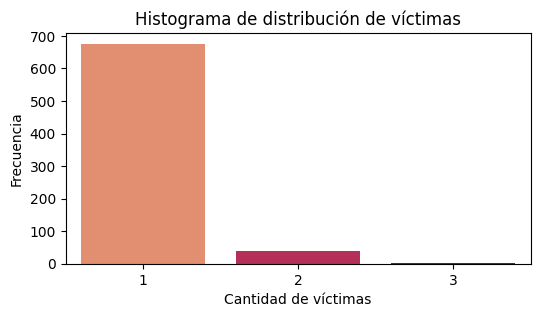

In [51]:
#Cantidad de victimas
plt.figure(figsize=(6, 3))

#Se cuentan los datos de la columna y se calcula la frecuencia en que se distribuye
sns.countplot(df, x='N_victimas', palette="rocket_r")

plt.ylabel("Frecuencia")
plt.xlabel("Cantidad de víctimas")
plt.title("Histograma de distribución de víctimas")

plt.show()

C:\Users\SimpleDeco\AppData\Local\Temp\ipykernel_5520\4198165069.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Sexo', palette="rocket_r")


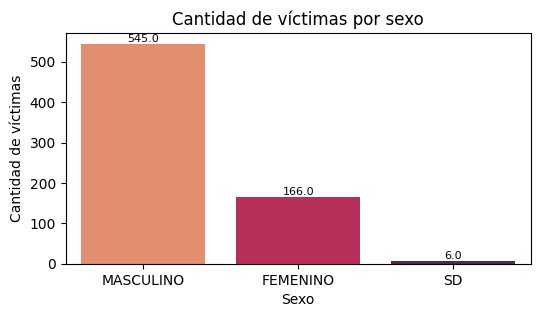

In [65]:
# Se crea el gráfico
plt.figure(figsize=(6, 3))

# Gráfico 1: Sexo
ax = sns.countplot(data=df, x='Sexo', palette="rocket_r")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)
    
plt.xlabel("Sexo")
plt.ylabel("Cantidad de víctimas")
plt.title("Cantidad de víctimas por sexo")

plt.show()



C:\Users\SimpleDeco\AppData\Local\Temp\ipykernel_5520\4031457389.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graf = sns.countplot(df, x='Tipo_de_calle', palette="rocket_r")


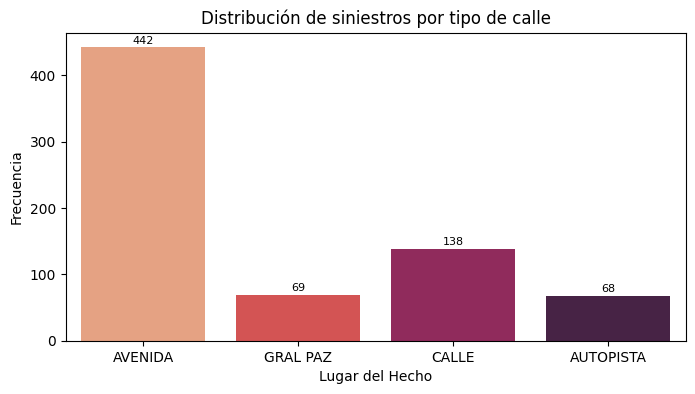

In [75]:
plt.figure(figsize=(8, 4))

graf = sns.countplot(df, x='Tipo_de_calle', palette="rocket_r")

for p in graf.patches:
    graf.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Lugar del Hecho')
plt.ylabel('Frecuencia')
plt.title('Distribución de siniestros por tipo de calle')

plt.show()

Se observa que los siniestros en avenidas es claramente mayor a otros diferentes tipos de calles. 

## Analisis por tipo de sexo


<Figure size 600x300 with 0 Axes>

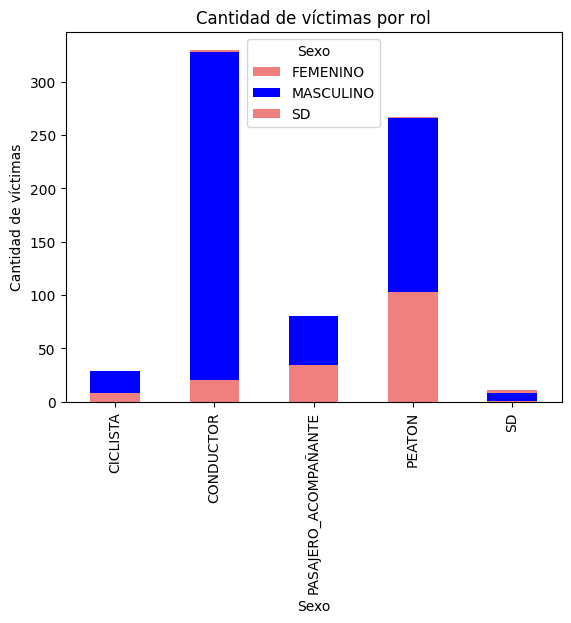

In [69]:
# Se crea el gráfico
plt.figure(figsize=(6, 3)) 

# Gráfico 2: Rol
df_rol = df.groupby(['Rol', 'Sexo']).size().unstack(fill_value=0)
df_rol.plot(kind='bar', stacked=True, color=["lightcoral",'blue'])

plt.xlabel("Sexo")
plt.ylabel("Cantidad de víctimas")
plt.title("Cantidad de víctimas por rol")

plt.show()

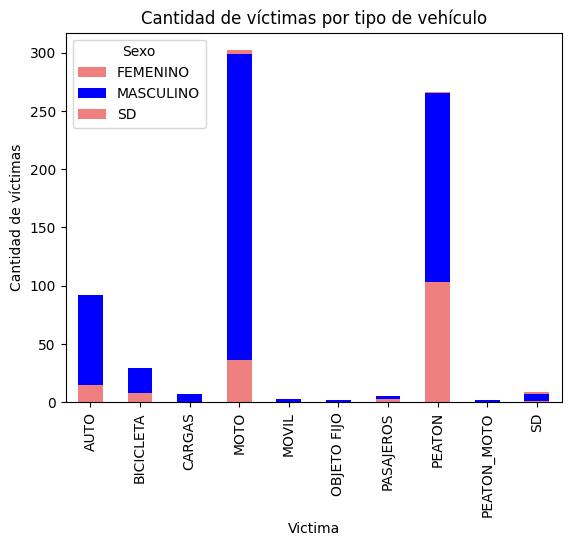

In [73]:
# Gráfico 3: Tipo de vehículo
df_victima = df.groupby(['Victima', 'Sexo']).size().unstack(fill_value=0)
df_victima.plot(kind='bar', stacked=True, color=["lightcoral","blue"])


plt.ylabel("Cantidad de víctimas")
plt.title("Cantidad de víctimas por tipo de vehículo")

plt.show()

Victimas

C:\Users\SimpleDeco\AppData\Local\Temp\ipykernel_5520\2451963230.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graf = sns.countplot(df, x='Victima', palette="rocket_r")


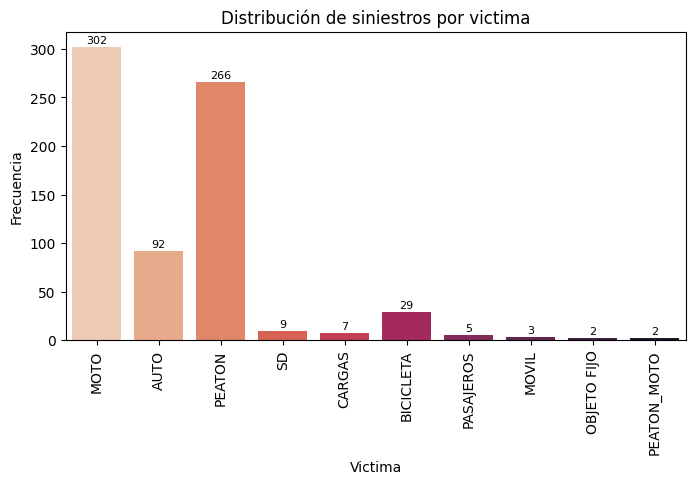

In [77]:
plt.figure(figsize=(8, 4))

graf = sns.countplot(df, x='Victima', palette="rocket_r")

for p in graf.patches:
    graf.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xticks(rotation=90)

plt.xlabel('Victima')
plt.ylabel('Frecuencia')
plt.title('Distribución de siniestros por victima')

plt.show()

Se observa que las víctimas de estos siniestros son en su gran mayoría en motos seguidos de peatones.

Acusado

C:\Users\SimpleDeco\AppData\Local\Temp\ipykernel_5520\3446340553.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graf = sns.countplot(df, x='Acusado', palette="flare")


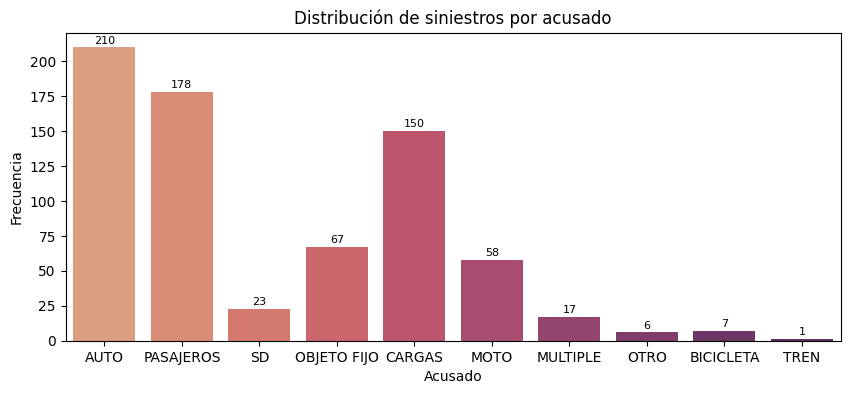

In [78]:
plt.figure(figsize=(10, 4))

graf = sns.countplot(df, x='Acusado', palette="flare")

for p in graf.patches:
    graf.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Acusado')
plt.ylabel('Frecuencia')
plt.title('Distribución de siniestros por acusado')

plt.show()

Los acusados en los siniestros son Autos y transportes de pasajeros. 

COmuna

C:\Users\SimpleDeco\AppData\Local\Temp\ipykernel_5520\452047513.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, y='Barrios', palette="rocket_r")


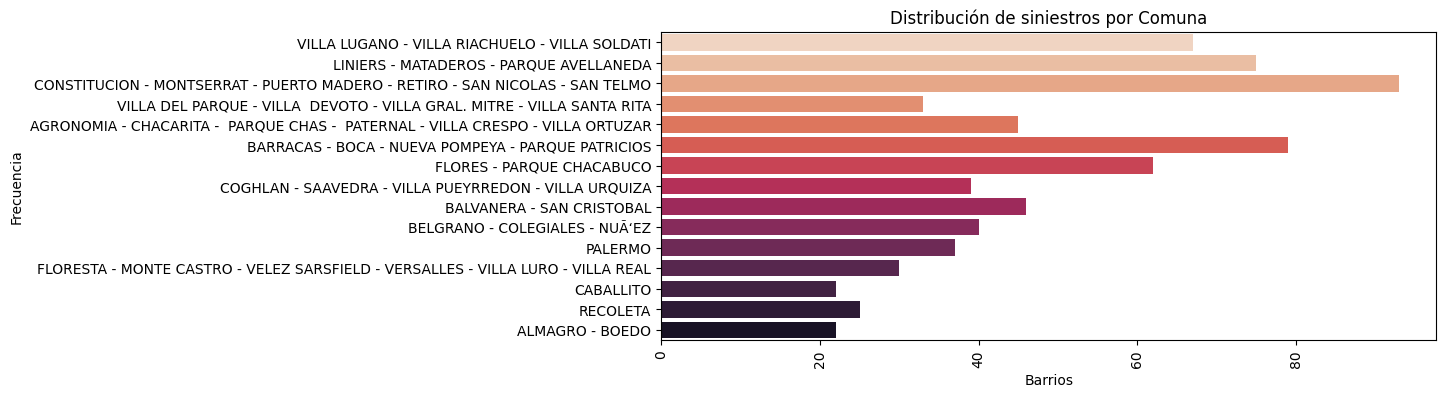

In [80]:
plt.figure(figsize=(10, 4))

sns.countplot(df, y='Barrios', palette="rocket_r")


plt.xticks(rotation=90)

plt.xlabel('Barrios')
plt.ylabel('Frecuencia')
plt.title('Distribución de siniestros por Comuna')

plt.show()